#   EV_Charging patterns

# Introduction


This dataset offers valuable information about electric vehicle (EV) charging habits, focusing on metrics such as energy usage, charging time, travel distance, battery capacity, state of charge, vehicle categories, user types, and external factors like temperature. The goal of the analysis is to identify trends in charging demand, efficiency, and user preferences, while also exploring how factors like vehicle age and environmental conditions influence charging behavior. These findings can help enhance charging infrastructure planning and support the broader adoption of sustainable EV practices

In [10]:
import seaborn as sns

# Import Data from a CSV file 

In [3]:
import pandas as pd
df=pd.read_csv("D:\data analytics\data set\ev_charging_patterns.csv")
print(df.head(10))
print(df.info())

   User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0   User_1        BMW i3              108.463007         Station_391   
1   User_2  Hyundai Kona              100.000000         Station_428   
2   User_3    Chevy Bolt               75.000000         Station_181   
3   User_4  Hyundai Kona               50.000000         Station_327   
4   User_5  Hyundai Kona               50.000000         Station_108   
5   User_6   Nissan Leaf               50.000000         Station_335   
6   User_7    Chevy Bolt               85.000000         Station_162   
7   User_8    Chevy Bolt               75.000000         Station_302   
8   User_9    Chevy Bolt               62.000000         Station_493   
9  User_10  Hyundai Kona               50.000000         Station_452   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 

# Cleaning Data

In [4]:

df.dropna(inplace=True)
print(df.head())

  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3              108.463007         Station_391   
1  User_2  Hyundai Kona              100.000000         Station_428   
2  User_3    Chevy Bolt               75.000000         Station_181   
3  User_4  Hyundai Kona               50.000000         Station_327   
4  User_5  Hyundai Kona               50.000000         Station_108   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                   Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
4               Los Angeles  2024-01-01 04:00:00  2024-01-01 05:46:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.591363        

# Plot Boxplot for Finding Outliers

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Battery Capacity (kWh)'),
  Text(1, 0, 'Energy Consumed (kWh)'),
  Text(2, 0, 'Charging Duration (hours)'),
  Text(3, 0, 'Charging Rate (kW)'),
  Text(4, 0, 'Charging Cost (USD)'),
  Text(5, 0, 'State of Charge (Start %)'),
  Text(6, 0, 'State of Charge (End %)'),
  Text(7, 0, 'Distance Driven (since last charge) (km)'),
  Text(8, 0, 'Temperature (°C)'),
  Text(9, 0, 'Vehicle Age (years)')])

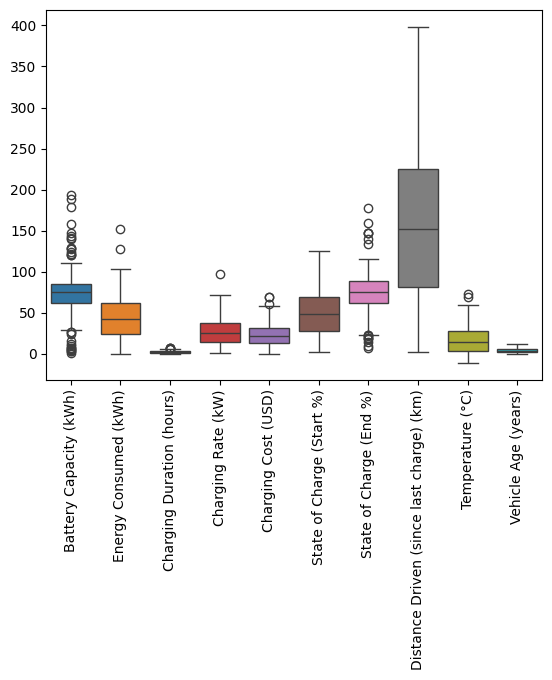

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df)
plt.xticks(rotation=90)


# Removing Outliers

In [20]:
import numpy as np
import pandas as pd
df=pd.read_csv("D:\data analytics\data set\ev_charging_patterns.csv")
df['z_score']=(df['Battery Capacity (kWh)']-df['Battery Capacity (kWh)'].mean())/df['Battery Capacity (kWh)'].std()
threshold=2
df_no_outliers = df[df['z_score'].abs()<=threshold]
df = df_no_outliers.drop(columns=['z_score'])
print(df)

        User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0        User_1        BMW i3              108.463007         Station_391   
1        User_2  Hyundai Kona              100.000000         Station_428   
2        User_3    Chevy Bolt               75.000000         Station_181   
3        User_4  Hyundai Kona               50.000000         Station_327   
4        User_5  Hyundai Kona               50.000000         Station_108   
...         ...           ...                     ...                 ...   
1314  User_1315  Hyundai Kona               50.000000         Station_353   
1315  User_1316   Nissan Leaf              100.000000          Station_57   
1316  User_1317        BMW i3              100.000000          Station_40   
1317  User_1318   Nissan Leaf              100.000000         Station_374   
1318  User_1319    Chevy Bolt               85.000000         Station_336   

     Charging Station Location  Charging Start Time    Charging End Time  \

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Battery Capacity (kWh)'),
  Text(1, 0, 'Energy Consumed (kWh)'),
  Text(2, 0, 'Charging Duration (hours)'),
  Text(3, 0, 'Charging Rate (kW)'),
  Text(4, 0, 'Charging Cost (USD)'),
  Text(5, 0, 'State of Charge (Start %)'),
  Text(6, 0, 'State of Charge (End %)'),
  Text(7, 0, 'Distance Driven (since last charge) (km)'),
  Text(8, 0, 'Temperature (°C)'),
  Text(9, 0, 'Vehicle Age (years)')])

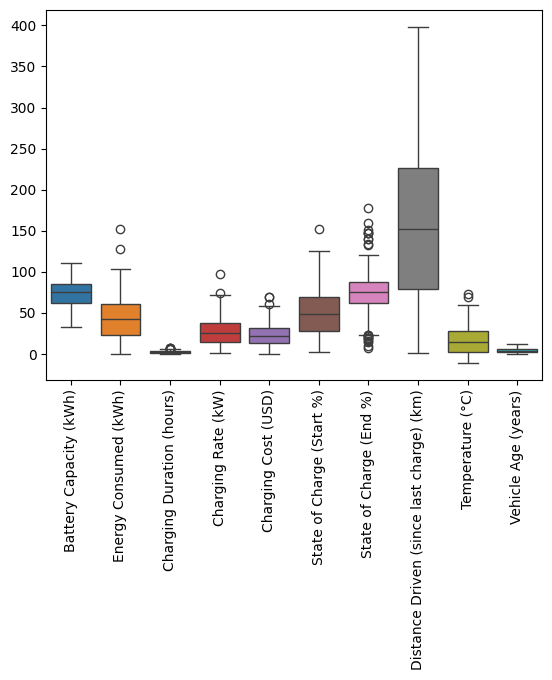

In [21]:
sns.boxplot(data=df)
plt.xticks(rotation=90)

# To find Information of Data

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

# Remove duplicates

In [22]:

df.drop_duplicates(inplace=True)
print(df.to_string())


        User ID  Vehicle Model  Battery Capacity (kWh) Charging Station ID Charging Station Location  Charging Start Time    Charging End Time  Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  State of Charge (End %)  Distance Driven (since last charge) (km)  Temperature (°C)  Vehicle Age (years)     Charger Type               User Type
0        User_1         BMW i3              108.463007         Station_391                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00              60.712346                   0.591363           36.389181            13.087717     Evening     Tuesday                  29.371576                86.119962                                293.602111         27.947953             2.000000  DC Fast Charger                Commuter
1        User_2   Hyundai Kona              100.000000         Station_428             San Francisco  2024-01-01 01:00:00  2024-01-01 03

  # what is highest charging cost?

In [ ]:

df['Charging Cost (USD)'].agg(['max'])
# df.info()
# print(df.max(column="Charging Cost (USD)"))

max    69.407743
Name: Charging Cost (USD), dtype: float64

#  What is highest charging capacity?

In [ ]:

import pandas as pd
df=pd.read_csv("D:\data analytics\data set\ev_charging_patterns.csv")
df['Battery Capacity (kWh)'].agg(['max'])

max    193.003074
Name: Battery Capacity (kWh), dtype: float64

# Find the correlation in data and plt heat map

                                          Battery Capacity (kWh)  \
Battery Capacity (kWh)                                  1.000000   
Energy Consumed (kWh)                                   0.000323   
Charging Duration (hours)                              -0.024824   
Charging Rate (kW)                                      0.015866   
Charging Cost (USD)                                    -0.000492   
State of Charge (Start %)                              -0.072148   
State of Charge (End %)                                -0.011512   
Distance Driven (since last charge) (km)               -0.041194   
Temperature (°C)                                       -0.036411   
Vehicle Age (years)                                     0.037673   

                                          Energy Consumed (kWh)  \
Battery Capacity (kWh)                                 0.000323   
Energy Consumed (kWh)                                  1.000000   
Charging Duration (hours)                         

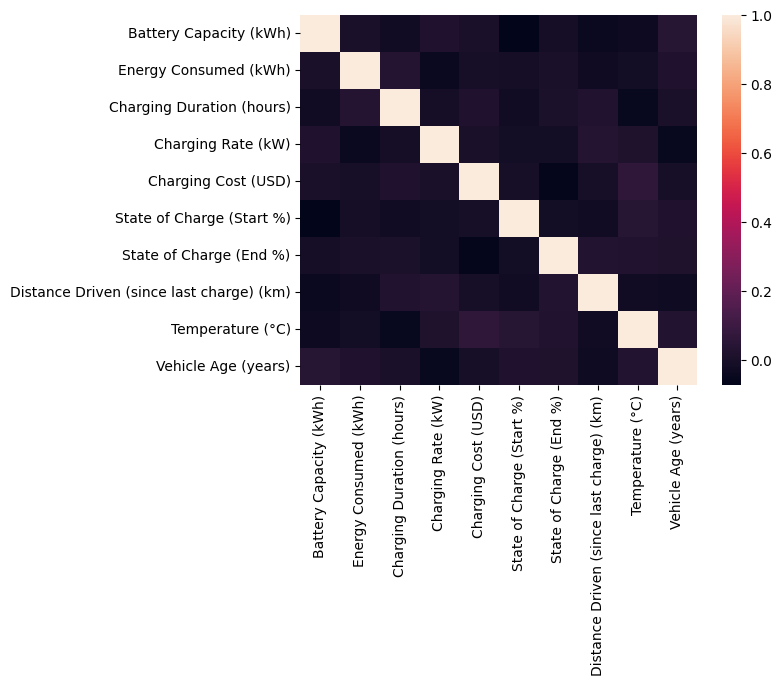

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("D:\data analytics\data set\ev_charging_patterns.csv")
# print(df.corr(),dtype=False)
corr=df.corr(numeric_only=True)
print(corr)
sns.heatmap(corr)
plt.show()

# Find the variation of charging duration when charger type is changed

Charger Type
DC Fast Charger    2.283546
Level 1            2.242876
Level 2            2.283465
Name: Charging Duration (hours), dtype: float64


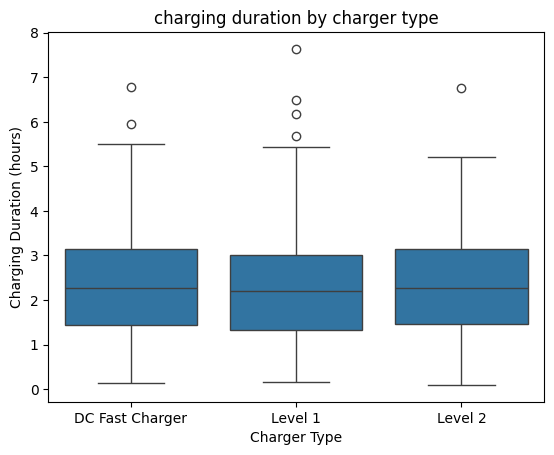

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("D:\data analytics\data set\ev_charging_patterns.csv")
mean_duration_by_charger = df.groupby('Charger Type')['Charging Duration (hours)'].mean()
print(mean_duration_by_charger)
sns.boxplot(x='Charger Type',y='Charging Duration (hours)',data=df)
plt.title('charging duration by charger type')
plt.show()


# Find Minimum vehicle age and maximum charging cost?

In [ ]:
import pandas as pd
df=pd.read_csv("D:\data analytics\data set\ev_charging_patterns.csv")
df['Vehicle Age (years)'].agg(['min'])
df['Charging Cost (USD)'].agg(['max'])


max    69.407743
Name: Charging Cost (USD), dtype: float64

#  Take details of vehicle models which have battery capacity above 100?

In [ ]:
import pandas as pd
df=pd.read_csv("D:\data analytics\data set\ev_charging_patterns.csv")
# x=df.loc[:,['Battery Capacity (kWh)']]>=100
filter_df=df[df['Battery Capacity (kWh)']>=100]
display(filter_df)

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.000000,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.000000,Level 1,Casual Driver
12,User_13,Hyundai Kona,100.000000,Station_16,San Francisco,2024-01-01 12:00:00,2024-01-01 13:00:00,34.256453,3.065585,5.523689,10.972136,Afternoon,Monday,19.205447,51.626483,249.127597,23.662965,0.000000,Level 2,Casual Driver
15,User_16,Nissan Leaf,100.000000,Station_147,Los Angeles,2024-01-01 15:00:00,2024-01-01 17:19:00,27.354318,2.703286,11.112499,33.093493,Evening,Monday,10.677154,72.403470,247.659437,-8.302137,1.535234,DC Fast Charger,Long-Distance Traveler
18,User_19,Tesla Model 3,100.000000,Station_434,New York,2024-01-01 18:00:00,2024-01-01 21:03:00,42.638018,0.807532,20.490846,25.078794,Evening,Saturday,55.517051,52.713489,280.862071,37.430357,0.000000,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,User_1314,Tesla Model 3,129.350616,Station_458,Chicago,2024-02-24 17:00:00,2024-02-24 19:35:00,60.725144,2.365991,10.491921,11.289733,Night,Saturday,41.856825,94.097883,279.552278,-1.369994,3.000000,Level 2,Long-Distance Traveler
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.000000,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.000000,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.000000,DC Fast Charger,Commuter


# How does temperature affect Energy Consumed or Charging Duration? plot temperature vs energy graph

Correlation between Temperature and Energy Consumed: -0.01850876868557003
Correlation between Temperature and Charging Duration: -0.05472375894929163


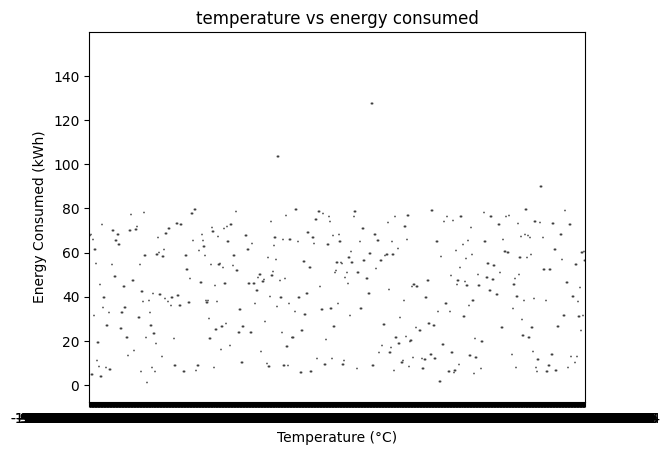

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("D:\data analytics\data set\ev_charging_patterns.csv")
data = df[['Temperature (°C)', 'Energy Consumed (kWh)', 'Charging Duration (hours)']].dropna()
correlation_energy = data['Temperature (°C)'].corr(data['Energy Consumed (kWh)'])
correlation_duration = data['Temperature (°C)'].corr(data['Charging Duration (hours)'])
print(f"Correlation between Temperature and Energy Consumed: {correlation_energy}")
print(f"Correlation between Temperature and Charging Duration: {correlation_duration}")
sns.boxplot(x='Temperature (°C)',y='Energy Consumed (kWh)',data=df)
plt.title('temperature vs energy consumed')
plt.show()











# What time of day is charging most frequent?

In [ ]:

df=pd.read_csv("D:\data analytics\data set\ev_charging_patterns.csv")
display(df['Time of Day'].value_counts())

Time of Day
Evening      362
Morning      336
Night        312
Afternoon    310
Name: count, dtype: int64

# How does vehicle age affect the charging rate or duration?

In [ ]:
import matplotlib.pyplot as plt
df=pd.read_csv("D:\data analytics\data set\ev_charging_patterns.csv")
df['Vehicle Age (years)'] = pd.to_numeric(df['Vehicle Age (years)'], errors='coerce')
df['Charging Rate (kW)'] = pd.to_numeric(df['Charging Rate (kW)'], errors='coerce')
df['Charging Duration (hours)'] = pd.to_numeric(df['Charging Duration (hours)'], errors='coerce')
charging_analysis = df.groupby('Vehicle Age (years)')[['Charging Rate (kW)', 'Charging Duration (hours)']].mean()
print(charging_analysis)




                     Charging Rate (kW)  Charging Duration (hours)
Vehicle Age (years)                                               
0.000000                      27.361916                   2.245204
0.020156                      47.723498                   3.894160
0.088598                       3.856692                   1.228841
0.190047                      19.480124                   3.777669
0.288408                      29.154482                   1.347310
...                                 ...                        ...
8.018666                      41.929169                   2.486375
9.076121                       8.559007                   1.328229
10.547237                     37.806096                   2.012293
10.634574                      3.984866                   3.370768
11.688592                     14.898359                   1.924573

[114 rows x 2 columns]


#  Calculate the average distance driven since the last charge?

In [ ]:
average_distance = df['Distance Driven (since last charge) (km)'].mean()
print(f"Average Distance Driven Since Last Charge: {average_distance:.2f} km")



Average Distance Driven Since Last Charge: 153.60 km


# Which locations have the highest charging demand?

Top Locations with Highest Charging Demand:
Charging Station Location
Los Angeles      297
San Francisco    264
Houston          262
New York         255
Chicago          242
Name: count, dtype: int64


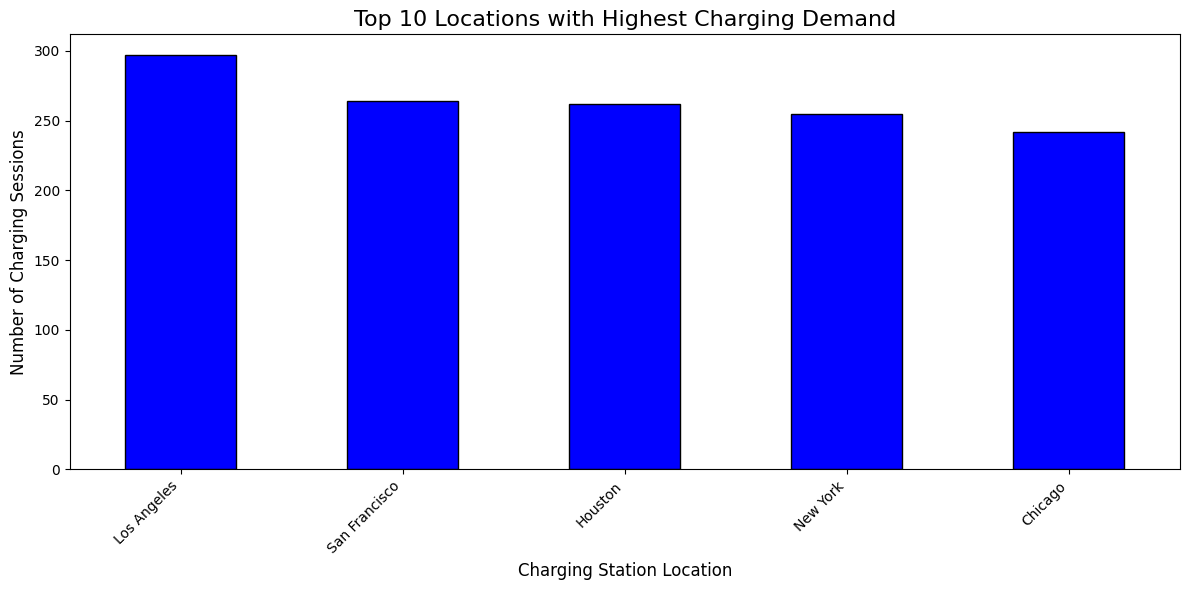

In [ ]:
import matplotlib.pyplot as plt
location_demand = df['Charging Station Location'].value_counts()
print("Top Locations with Highest Charging Demand:")
print(location_demand.head(10))
location_demand = df['Charging Station Location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
location_demand.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Top 10 Locations with Highest Charging Demand", fontsize=16)
plt.xlabel("Charging Station Location", fontsize=12)
plt.ylabel("Number of Charging Sessions", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# What is the relationship between Battery Capacity and State of Charge after charging?

In [ ]:
filtered_data =df[['Battery Capacity (kWh)', 'State of Charge (End %)']].dropna()
corr = filtered_data['Battery Capacity (kWh)'].corr(filtered_data['State of Charge (End %)'])
print(f"Correlation between Battery Capacity and State of Charge (End %): {corr}")





Correlation between Battery Capacity and State of Charge (End %): -0.011511572972462367


# Analysis Summary

From the analysis of EV_Charging patterns of data following insights have been taken
-> Highest ev_charging capacity and cost is 193.60 ,69.43
-> Variation charging duration when charger type is changed is analysed.
-> Maximum electric vehicle age is calculated.
-> Correlations between temperature and metrics like Energy Consumed (kWh) and Charging Duration (hours) were calculated.
-> The most frequent charging time of a day is Evening.
-> Average distance driven by an ev since last charge computed.
-> los angeles is the location with highest charging demand.
-> The relationship between battery capacity and state of charge after charging is computed.
-> Evaluated the vehiclemodel having battery capacity above 100.